In [109]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 저장
import pickle

### 데이터를 불러온다.

In [2]:
pitcher = pd.read_csv('data/picher_stats_2017.csv')
batter = pd.read_csv('data/batter_stats_2017.csv')

display(pitcher)
display(batter)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,김민식,KIA,135,391,351,78,4,39,40,26,...,3,0.252,0.222,0.284,0.293,0.577,0.261,-1.07,15000,6000
187,장민석,한화,88,327,299,83,1,38,21,15,...,8,0.34,0.278,0.311,0.318,0.629,0.283,-1.08,11000,10000
188,채은성,LG,114,372,333,89,2,28,35,17,...,5,0.327,0.267,0.323,0.339,0.662,0.298,-1.12,11000,16000
189,김주형,KIA,57,116,106,18,0,11,10,8,...,0,0.191,0.170,0.233,0.217,0.450,0.210,-1.20,7500,11000


In [3]:
pitcher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [4]:
pitcher.isna().sum()

선수명         0
팀명          0
승           0
패           0
세           0
홀드          0
블론          0
경기          0
선발          0
이닝          0
삼진/9        0
볼넷/9        0
홈런/9        0
BABIP       0
LOB%        0
ERA         0
RA9-WAR     0
FIP         0
kFIP        0
WAR         0
연봉(2018)    0
연봉(2017)    0
dtype: int64

In [5]:
batter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       191 non-null    object 
 1   팀명        191 non-null    object 
 2   경기        191 non-null    int64  
 3   타석        191 non-null    int64  
 4   타수        191 non-null    int64  
 5   안타        191 non-null    int64  
 6   홈런        191 non-null    int64  
 7   득점        191 non-null    int64  
 8   타점        191 non-null    int64  
 9   볼넷        191 non-null    int64  
 10  삼진        191 non-null    int64  
 11  도루        191 non-null    int64  
 12  BABIP     191 non-null    object 
 13  타율        191 non-null    float64
 14  출루율       191 non-null    float64
 15  장타율       191 non-null    float64
 16  OPS       191 non-null    float64
 17  wOBA      191 non-null    float64
 18  WAR       191 non-null    float64
 19  연봉(2018)  191 non-null    int64  
 20  연봉(2017)  191 non-null    int64 

In [6]:
batter.isna().sum()

선수명         0
팀명          0
경기          0
타석          0
타수          0
안타          0
홈런          0
득점          0
타점          0
볼넷          0
삼진          0
도루          0
BABIP       0
타율          0
출루율         0
장타율         0
OPS         0
wOBA        0
WAR         0
연봉(2018)    0
연봉(2017)    0
dtype: int64

### 연봉에 대한 정보

In [7]:
# 투수 2018년도 연봉
pitcher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

In [8]:
# 정렬해서 확인해본다.
pitcher.sort_values(by='연봉(2018)', ascending=False)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
20,정우람,한화,6,4,26,0,5,56,0,59.0,...,0.76,0.304,79.4,2.75,2.85,3.26,2.69,1.81,120000,120000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,장지훈,삼성,0,0,0,0,0,4,0,2.1,...,0.00,0.500,100.0,0.00,0.09,0.73,-0.69,0.08,2800,2700
89,차재용,롯데,0,0,0,0,0,3,0,2.1,...,0.00,0.167,100.0,0.00,0.08,2.02,1.83,0.05,2800,2800
103,성영훈,두산,0,0,0,0,0,1,0,1.0,...,0.00,0.000,100.0,0.00,0.04,6.73,7.64,-0.01,2700,2700
115,정동윤,SK,0,0,0,0,0,2,0,3.0,...,3.00,0.364,71.4,9.00,-0.03,9.40,10.05,-0.07,2700,2700


### hist()

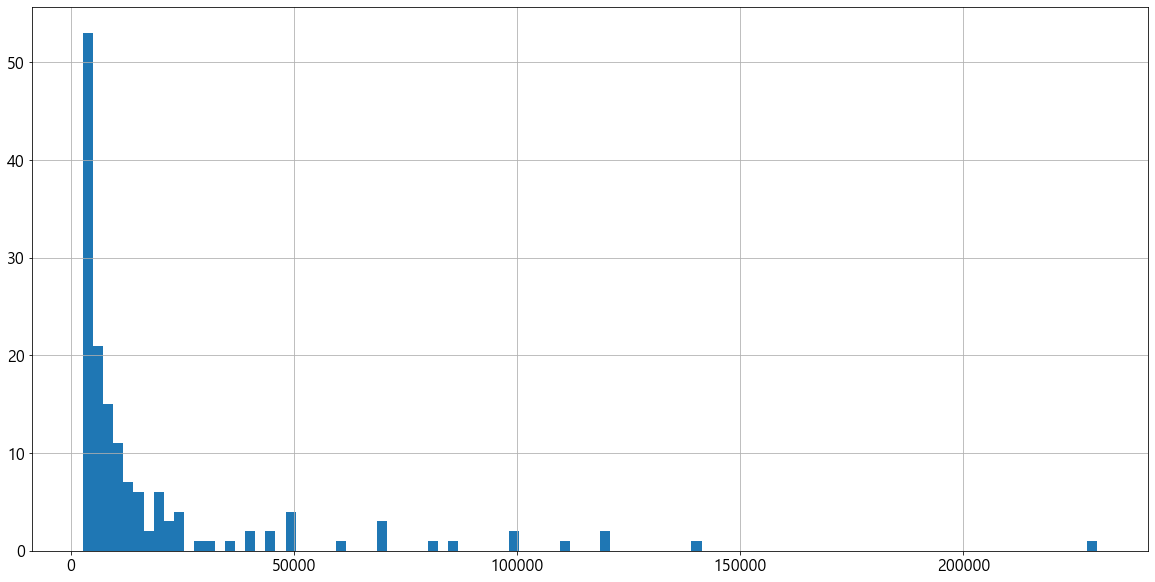

In [9]:
pitcher['연봉(2018)'].hist(bins=100)
plt.show()

### plot.bar()

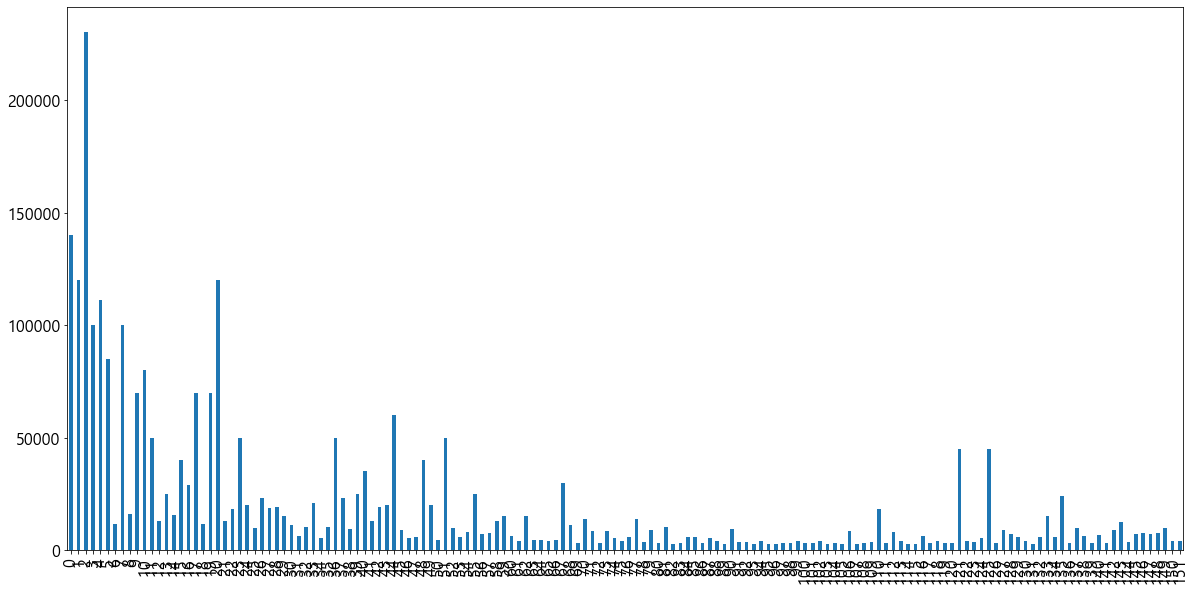

In [10]:
pitcher['연봉(2018)'].plot.bar()
plt.show()

In [11]:
batter['연봉(2018)'].describe()

count       191.000000
mean      20625.654450
std       31978.855209
min        2700.000000
25%        4200.000000
50%        7500.000000
75%       25000.000000
max      250000.000000
Name: 연봉(2018), dtype: float64

In [12]:
batter.sort_values(by='연봉(2018)', ascending=False)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
16,이대호,롯데,142,608,540,173,34,73,111,50,...,1,0.327,0.320,0.391,0.533,0.924,0.388,3.86,250000,250000
22,김태균,한화,94,407,356,121,17,51,76,43,...,0,0.362,0.340,0.413,0.545,0.958,0.401,2.96,160000,160000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000
10,러프,삼성,134,591,515,162,31,90,124,60,...,2,0.344,0.315,0.396,0.569,0.965,0.402,4.59,140000,110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,이우성,두산,2,2,2,0,0,0,0,0,...,0,0,0.000,0.000,0.000,0.000,0.000,-0.07,2800,2800
104,박유연,두산,3,3,3,1,0,0,0,0,...,0,1,0.333,0.333,0.333,0.666,0.299,0.00,2800,2700
147,신진호,NC,9,12,12,1,0,1,0,0,...,0,0.143,0.083,0.083,0.167,0.250,0.103,-0.23,2800,2700
133,박성한,SK,2,4,4,0,0,0,0,0,...,0,0,0.000,0.000,0.000,0.000,0.000,-0.13,2700,2700


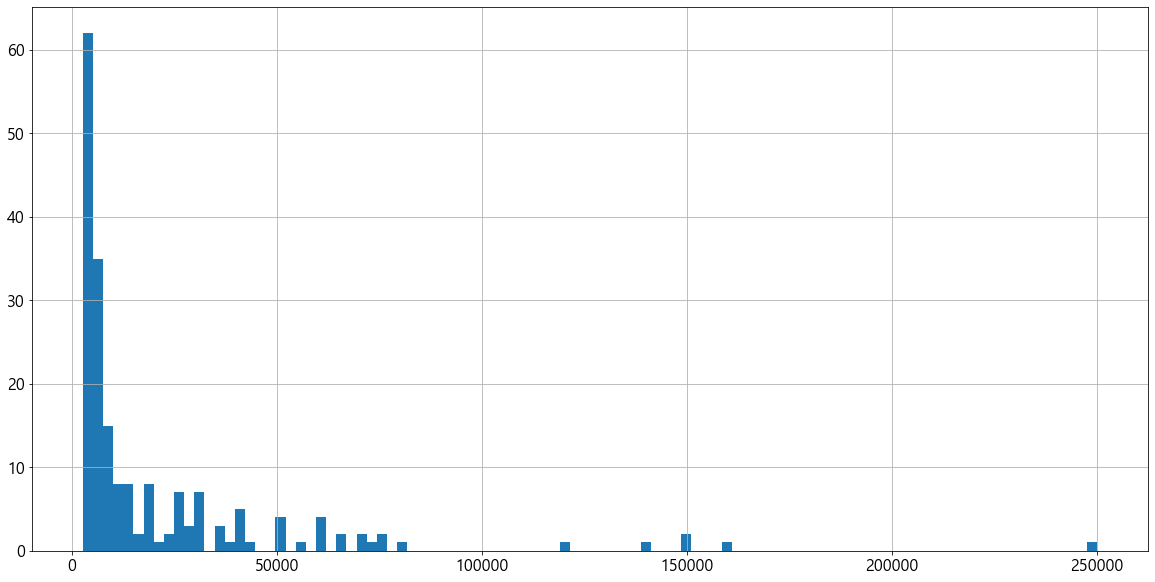

In [13]:
batter['연봉(2018)'].hist(bins=100)
plt.show()

### 회귀분석에서 사용할 특성 살펴보기

In [14]:
# 컬럼 종류 파악
pitcher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [15]:
# 선수명과 팀명을 뺀 나머지만 가져온다.
pitcher2 = pitcher.drop(['선수명', '팀명'], axis=1)
pitcher2

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


### 그래프 컬럼들의 분포 확인하기

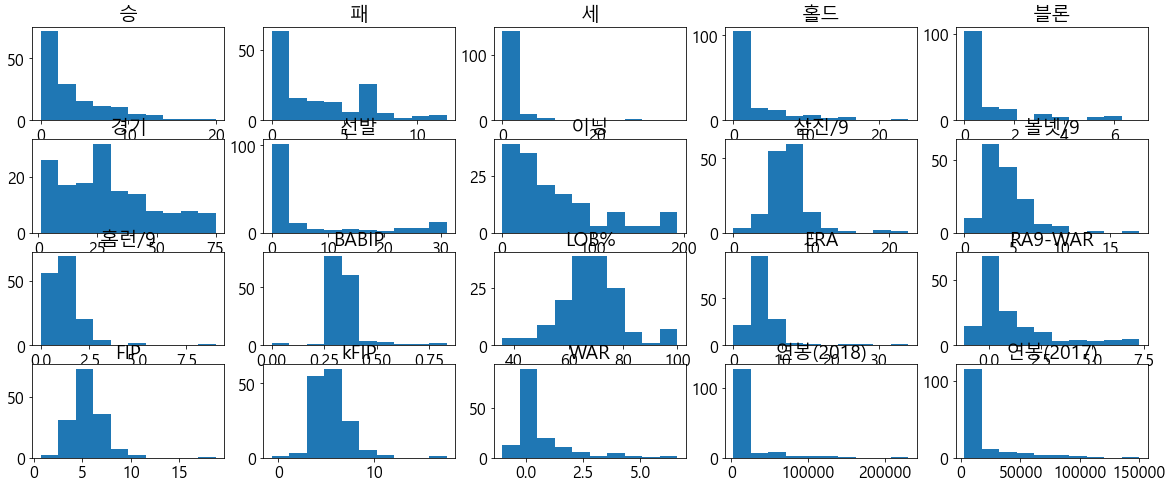

In [16]:
# 그래프 객체를 생성한다.
fig = plt.figure()

# 컬럼의 수 만큼 반복한다.
for i in range(len(pitcher2.columns)) :
    
    # 현재 번째의 컬럼이름을 가져온다.
    column_name = pitcher2.columns[i]
    
    # 서브플롯을 생성한다.
    # 행수, 열수, 위치(1부터 시작)
    ax = fig.add_subplot(5, 5, i + 1)
    # 히스토그램을 그린다.
    plt.hist(pitcher2[column_name])
    
    ax.set_title(column_name)
    
plt.show()

### 투수 연봉 예측하기

In [17]:
pitcher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [18]:
# 불필요한 컬럼을 제거한다.
pitcher_df = pitcher.drop('선수명', axis=1)
pitcher_df.columns

Index(['팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [19]:
#  입력과 결과로 나눈다.
X = pitcher_df.drop('연봉(2018)', axis=1)
y = pitcher_df['연봉(2018)']

display(X)
display(y)

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,한화,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,KIA,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,롯데,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,삼성,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64

In [20]:
pitcher_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   팀명        152 non-null    object 
 1   승         152 non-null    int64  
 2   패         152 non-null    int64  
 3   세         152 non-null    int64  
 4   홀드        152 non-null    int64  
 5   블론        152 non-null    int64  
 6   경기        152 non-null    int64  
 7   선발        152 non-null    int64  
 8   이닝        152 non-null    float64
 9   삼진/9      152 non-null    float64
 10  볼넷/9      152 non-null    float64
 11  홈런/9      152 non-null    float64
 12  BABIP     152 non-null    float64
 13  LOB%      152 non-null    float64
 14  ERA       152 non-null    float64
 15  RA9-WAR   152 non-null    float64
 16  FIP       152 non-null    float64
 17  kFIP      152 non-null    float64
 18  WAR       152 non-null    float64
 19  연봉(2018)  152 non-null    int64  
 20  연봉(2017)  152 non-null    int64 

In [21]:
# 팀명을 숫자로 변환한다.
encoder1 = LabelEncoder()
encoder1.fit(X['팀명'])
X['팀명'] = encoder1.transform(X['팀명'])
X['팀명']

0      4
1      2
2      0
3      2
4      6
      ..
147    8
148    0
149    6
150    7
151    1
Name: 팀명, Length: 152, dtype: int32

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   팀명        152 non-null    int32  
 1   승         152 non-null    int64  
 2   패         152 non-null    int64  
 3   세         152 non-null    int64  
 4   홀드        152 non-null    int64  
 5   블론        152 non-null    int64  
 6   경기        152 non-null    int64  
 7   선발        152 non-null    int64  
 8   이닝        152 non-null    float64
 9   삼진/9      152 non-null    float64
 10  볼넷/9      152 non-null    float64
 11  홈런/9      152 non-null    float64
 12  BABIP     152 non-null    float64
 13  LOB%      152 non-null    float64
 14  ERA       152 non-null    float64
 15  RA9-WAR   152 non-null    float64
 16  FIP       152 non-null    float64
 17  kFIP      152 non-null    float64
 18  WAR       152 non-null    float64
 19  연봉(2017)  152 non-null    int64  
dtypes: float64(11), int32(1), int64(

In [23]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[-0.04225053,  3.32457765,  1.23120199, ..., -1.06162315,
         4.51802888,  2.74374569],
       [-0.7977895 ,  2.02618144,  2.51300132, ..., -1.07681252,
         4.10827019,  1.34172411],
       [-1.55332846,  4.36329461,  0.91075216, ..., -0.86922457,
         3.77439273,  5.34750005],
       ...,
       [ 0.71328843, -0.8302902 , -0.37104718, ...,  1.39399038,
        -0.9681847 , -0.02023971],
       [ 1.09105791, -0.8302902 , -0.05059734, ...,  0.71553221,
        -1.03647782, -0.54499636],
       [-1.17555898,  0.20842676,  0.26985249, ...,  1.15096059,
        -1.27170966, -0.54099058]])

In [24]:
# 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 이전에 만든 예제들이 X, y로 사용하고 있기 때문에 변수에 담아준다.
X = X_train
y = y_train

In [25]:
params = {
    # 이웃의 개수
    'n_neighbors' : list(range(1, 11))
}

model1 = KNeighborsRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring='r2', cv=kfold)
grid_clf1.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf1.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf1.best_score_}')

최적의 하이퍼 파라미터 : {'n_neighbors': 3}
최적의 모델 평균성능 : 0.7477488103513807


In [26]:
# Ridge
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model3 = Ridge()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf3 = GridSearchCV(model3, param_grid=params, scoring='r2', cv=kfold)
grid_clf3.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf3.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf3.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 10}
최적의 모델 평균성능 : 0.764837662370426


In [27]:
# Lasso
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model4 = Lasso()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf4 = GridSearchCV(model4, param_grid=params, scoring='r2', cv=kfold)
grid_clf4.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf4.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf4.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 1000}
최적의 모델 평균성능 : 0.8043722253813904


In [28]:
# ElasticNet
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model5 = ElasticNet()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf5 = GridSearchCV(model5, param_grid=params, scoring='r2', cv=kfold)
grid_clf5.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf5.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf5.best_score_}')

최적의 하이퍼 파라미터 : {'alpha': 0.1}
최적의 모델 평균성능 : 0.7524736911380507


In [29]:
# SVM(SVR)
# C : 규제의 강도 
params = {
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model6 = SVR()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf6 = GridSearchCV(model6, param_grid=params, scoring='r2', cv=kfold)
grid_clf6.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf6.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf6.best_score_}')

최적의 하이퍼 파라미터 : {'C': 10000}
최적의 모델 평균성능 : 0.6147733159016664


In [30]:
# max_depth : 최대 질문 생성 깊이
params = {
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model7 = DecisionTreeRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf7 = GridSearchCV(model7, param_grid=params, scoring='r2', cv=kfold)
grid_clf7.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf7.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf7.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 7}
최적의 모델 평균성능 : 0.6376240671763796


In [31]:
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model8 = RandomForestRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf8 = GridSearchCV(model8, param_grid=params, scoring='r2', cv=kfold)
grid_clf8.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf8.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf8.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': 9, 'n_estimators': 50}
최적의 모델 평균성능 : 0.8462238613091824


In [32]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
}

model9 = AdaBoostRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf9 = GridSearchCV(model9, param_grid=params, scoring='r2', cv=kfold)
grid_clf9.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf9.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf9.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.001, 'n_estimators': 50}
최적의 모델 평균성능 : 0.8231307081063404


In [33]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model10 = GradientBoostingRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf10 = GridSearchCV(model10, param_grid=params, scoring='r2', cv=kfold)
grid_clf10.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf10.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf10.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}
최적의 모델 평균성능 : 0.8440726602252255


In [34]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model11 = LGBMRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf11 = GridSearchCV(model11, param_grid=params, scoring='r2', cv=kfold)
grid_clf11.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf11.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf11.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
최적의 모델 평균성능 : 0.5033207223945694


In [35]:
# booster : 사용할 알고리즘 종류
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'booster' : ['gbtree', 'gblinear'],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model12 = XGBRegressor(silent=True, verbosity=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf12 = GridSearchCV(model12, param_grid=params, scoring='r2', cv=kfold)
grid_clf12.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf12.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf12.best_score_}')

최적의 하이퍼 파라미터 : {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}
최적의 모델 평균성능 : 0.8038618431670816


In [36]:
# 최적의 모델을 생성한다.
best_model1 = grid_clf1.best_estimator_
best_model2 = LinearRegression()
best_model3 = grid_clf3.best_estimator_
best_model4 = grid_clf4.best_estimator_
best_model5 = grid_clf5.best_estimator_
best_model6 = grid_clf6.best_estimator_
best_model7 = grid_clf7.best_estimator_
best_model8 = grid_clf8.best_estimator_
best_model9 = grid_clf9.best_estimator_
best_model10 = grid_clf10.best_estimator_
best_model11 = grid_clf11.best_estimator_
best_model12 = grid_clf12.best_estimator_

# 사용할 알고리즘들..
model_list = [
    ('model1', best_model1), ('model2', best_model2), ('model3', best_model3),
    ('model4', best_model4), ('model5', best_model5), ('model6', best_model6),
    ('model7', best_model7), ('model8', best_model8), ('model9', best_model9),
    ('model10', best_model10), ('model11', best_model11),
    ('model12', best_model12)
]

best_model13 = VotingRegressor(estimators=model_list)

In [37]:
# 교차 검증을 수행한다.
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(best_model1, X, y, scoring='r2', cv=kfold)
r2 = cross_val_score(best_model2, X, y, scoring='r2', cv=kfold)
r3 = cross_val_score(best_model3, X, y, scoring='r2', cv=kfold)
r4 = cross_val_score(best_model4, X, y, scoring='r2', cv=kfold)
r5 = cross_val_score(best_model5, X, y, scoring='r2', cv=kfold)
r6 = cross_val_score(best_model6, X, y, scoring='r2', cv=kfold)
r7 = cross_val_score(best_model7, X, y, scoring='r2', cv=kfold)
r8 = cross_val_score(best_model8, X, y, scoring='r2', cv=kfold)
r9 = cross_val_score(best_model9, X, y, scoring='r2', cv=kfold)
r10 = cross_val_score(best_model10, X, y, scoring='r2', cv=kfold)
r11 = cross_val_score(best_model11, X, y, scoring='r2', cv=kfold)
r12 = cross_val_score(best_model12, X, y, scoring='r2', cv=kfold)
r13 = cross_val_score(best_model13, X, y, scoring='r2', cv=kfold)


In [38]:
print(r1.mean())
print(r2.mean())
print(r3.mean())
print(r4.mean())
print(r5.mean())
print(r6.mean())
print(r7.mean())
print(r8.mean())
print(r9.mean())
print(r10.mean())
print(r11.mean())
print(r12.mean())
print(r13.mean())

0.7477488103513807
0.5458218193420019
0.764837662370426
0.8043722253813904
0.7524736911380507
0.6147733159016664
0.5530856105419373
0.7920610548053547
0.8067696565883198
0.8404680987432116
0.5033207223945694
0.8038618431670816
0.8559321204324128


### 학습 데이터를 이용해 평가를 실시한다.

In [40]:
# 전체 데이터를 학습시킨다.
best_model1.fit(X, y)
best_model2.fit(X, y)
best_model3.fit(X, y)
best_model4.fit(X, y)
best_model5.fit(X, y)
best_model6.fit(X, y)
best_model7.fit(X, y)
best_model8.fit(X, y)
best_model9.fit(X, y)
best_model10.fit(X, y)
best_model11.fit(X, y)
best_model12.fit(X, y)
best_model13.fit(X, y)

VotingRegressor(estimators=[('model1', KNeighborsRegressor(n_neighbors=3)),
                            ('model2', LinearRegression()),
                            ('model3', Ridge(alpha=10)),
                            ('model4', Lasso(alpha=1000)),
                            ('model5', ElasticNet(alpha=0.1)),
                            ('model6', SVR(C=10000)),
                            ('model7', DecisionTreeRegressor(max_depth=7)),
                            ('model8',
                             RandomForestRegressor(max_depth=9,
                                                   n_estimators=50)),
                            ('model9', AdaBoostRegress...
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=1, min_child_weight=1,
                       

In [41]:
# 학습 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X)
y_pred2 = best_model2.predict(X)
y_pred3 = best_model3.predict(X)
y_pred4 = best_model4.predict(X)
y_pred5 = best_model5.predict(X)
y_pred6 = best_model6.predict(X)
y_pred7 = best_model7.predict(X)
y_pred8 = best_model8.predict(X)
y_pred9 = best_model9.predict(X)
y_pred10 = best_model10.predict(X)
y_pred11 = best_model11.predict(X)
y_pred12 = best_model12.predict(X)
y_pred13 = best_model13.predict(X)

In [53]:
# 그래프를 그리기 위해 y 값 인덱스를 다시 설정한다.
y.reset_index(drop=True, inplace=True)

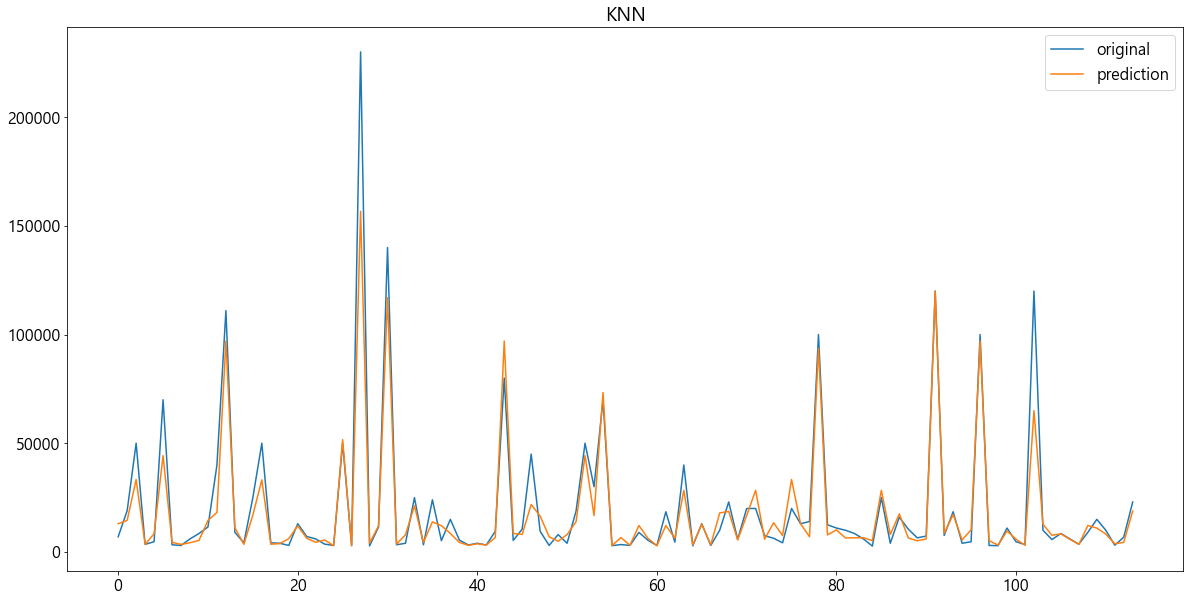

In [55]:
plt.plot(y, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('KNN')
plt.show()

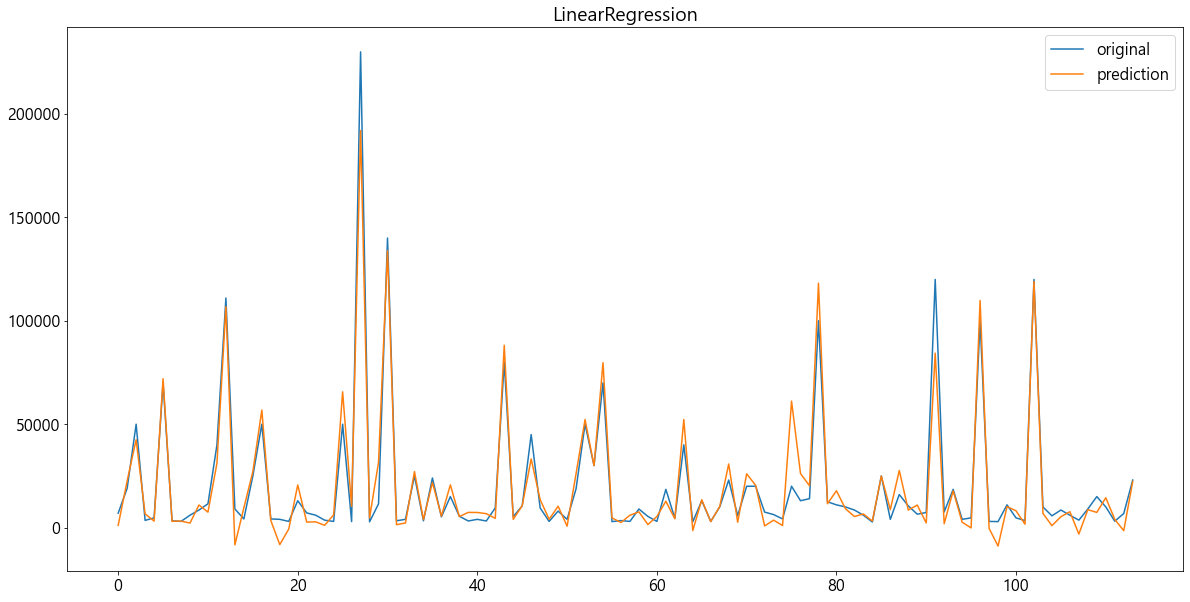

In [56]:
plt.plot(y, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('LinearRegression')
plt.show()

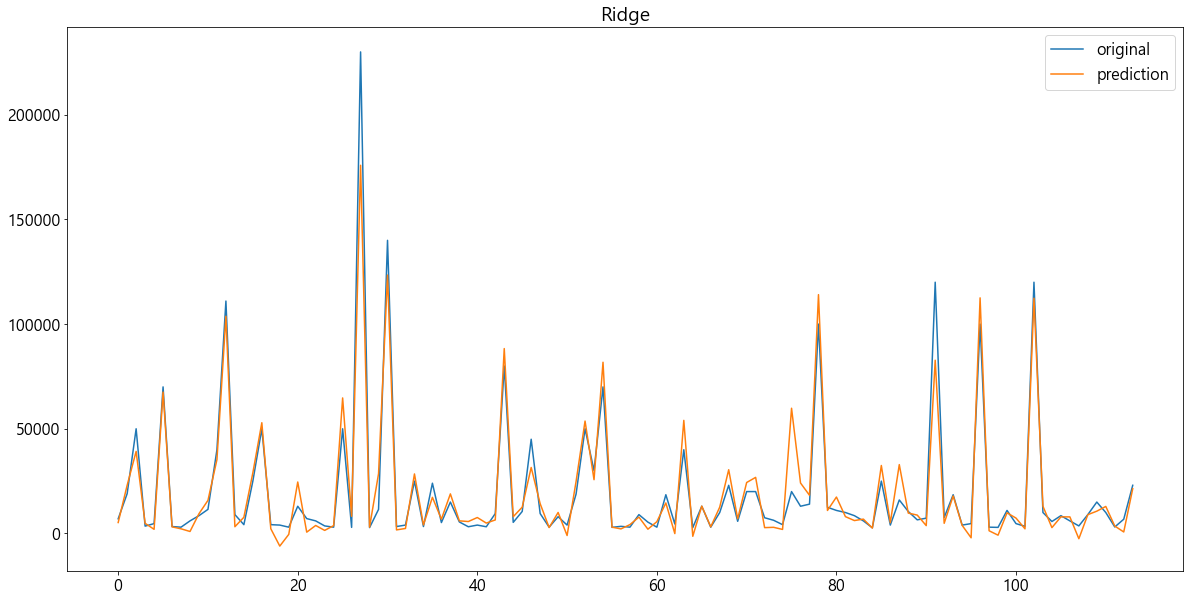

In [58]:
plt.plot(y, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('Ridge')
plt.show()

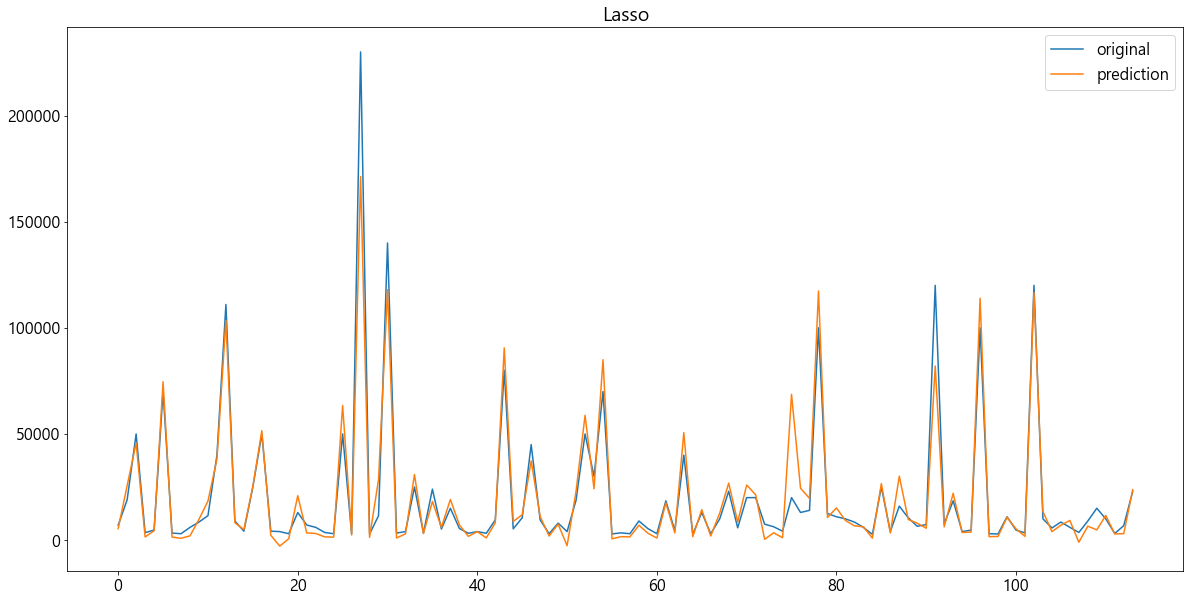

In [60]:
plt.plot(y, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('Lasso')
plt.show()

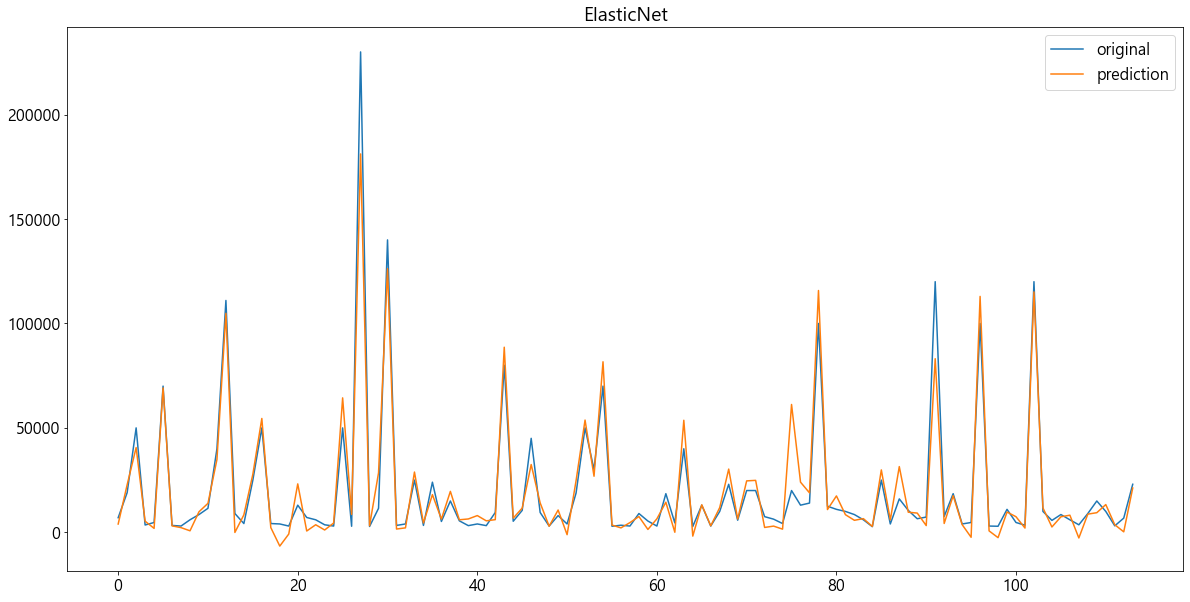

In [62]:
plt.plot(y, label='original')
plt.plot(y_pred5, label='prediction')
plt.legend()
plt.title('ElasticNet')
plt.show()

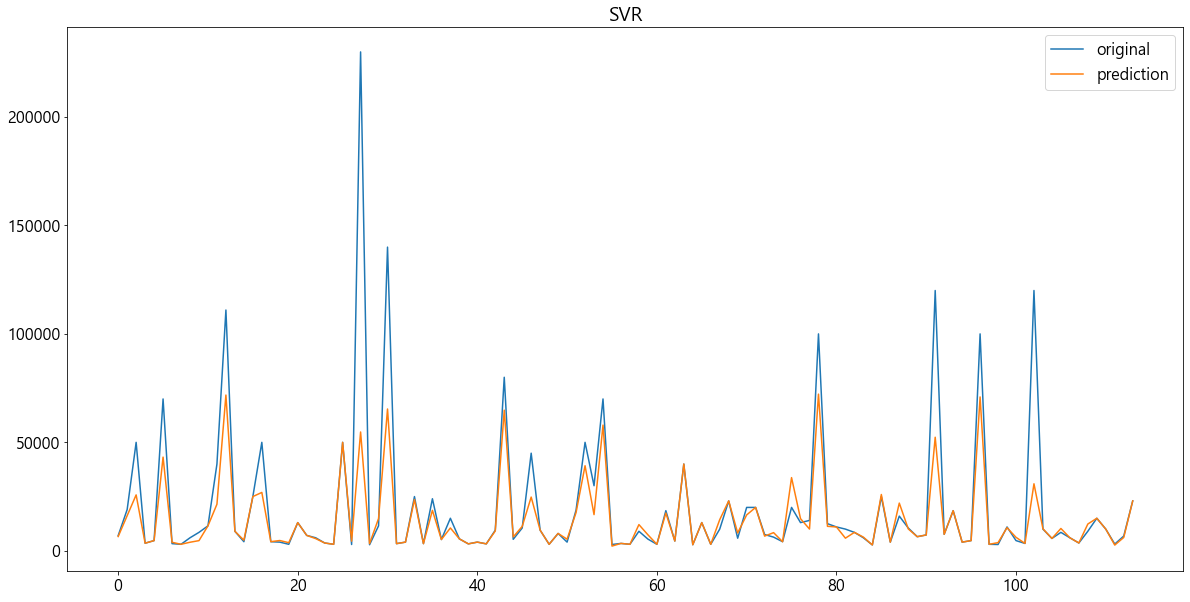

In [64]:
plt.plot(y, label='original')
plt.plot(y_pred6, label='prediction')
plt.legend()
plt.title('SVR')
plt.show()

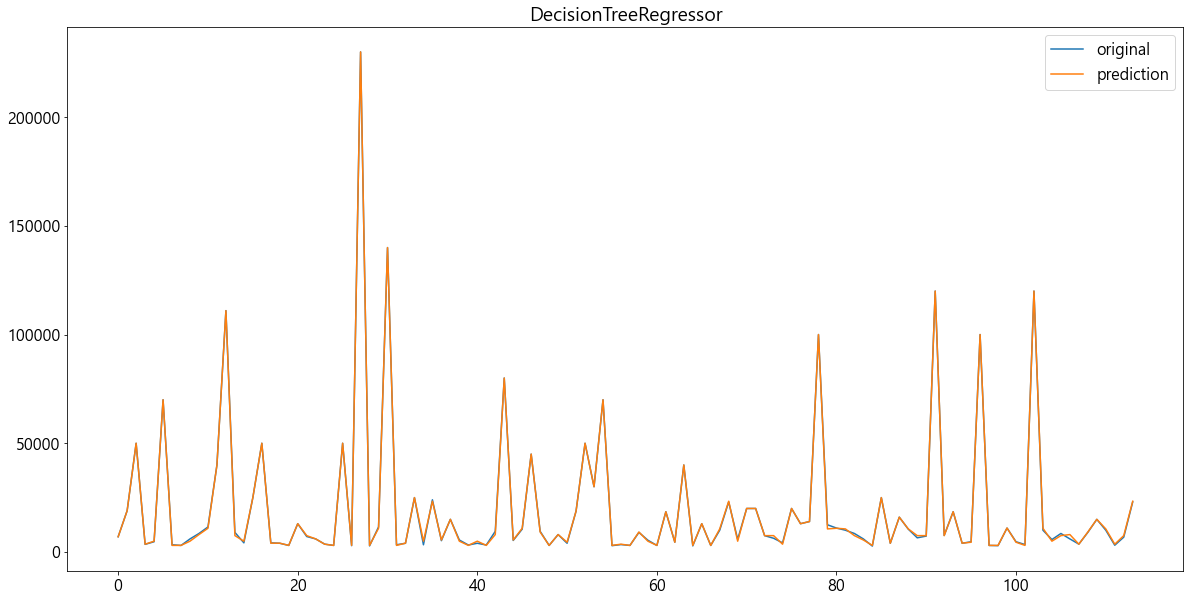

In [66]:
plt.plot(y, label='original')
plt.plot(y_pred7, label='prediction')
plt.legend()
plt.title('DecisionTreeRegressor')
plt.show()

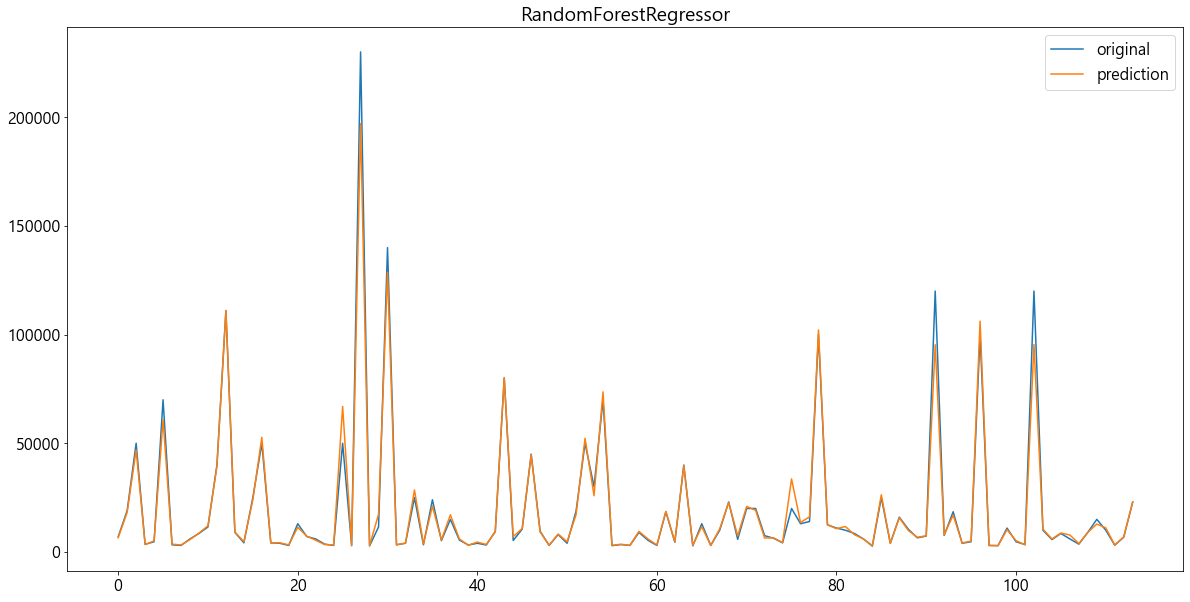

In [68]:
plt.plot(y, label='original')
plt.plot(y_pred8, label='prediction')
plt.legend()
plt.title('RandomForestRegressor')
plt.show()

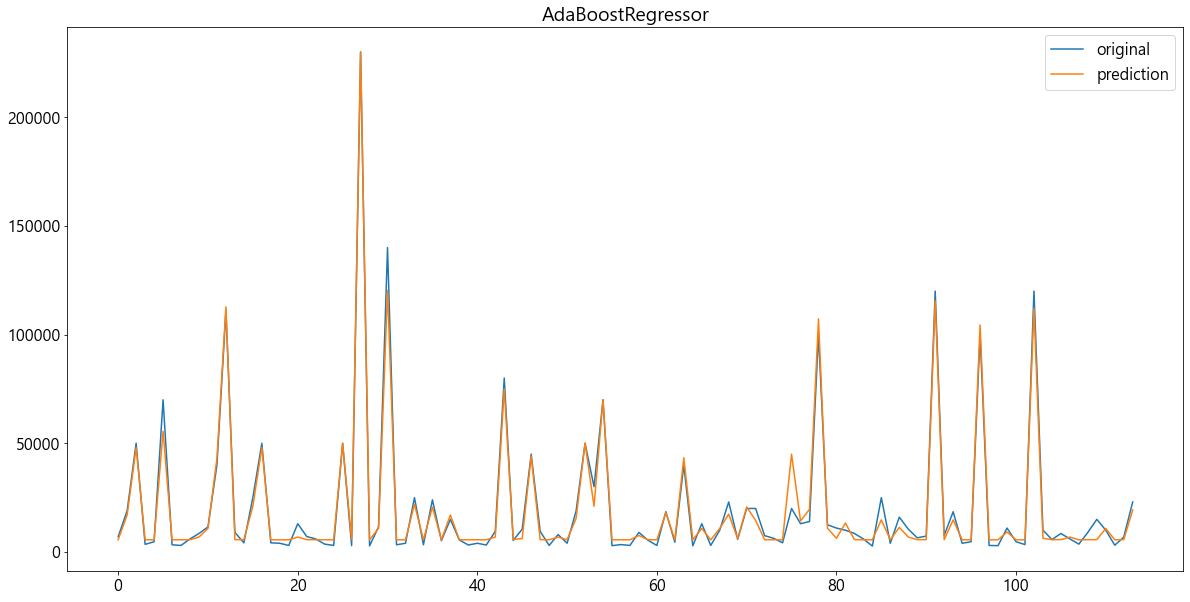

In [70]:
plt.plot(y, label='original')
plt.plot(y_pred9, label='prediction')
plt.legend()
plt.title('AdaBoostRegressor')
plt.show()

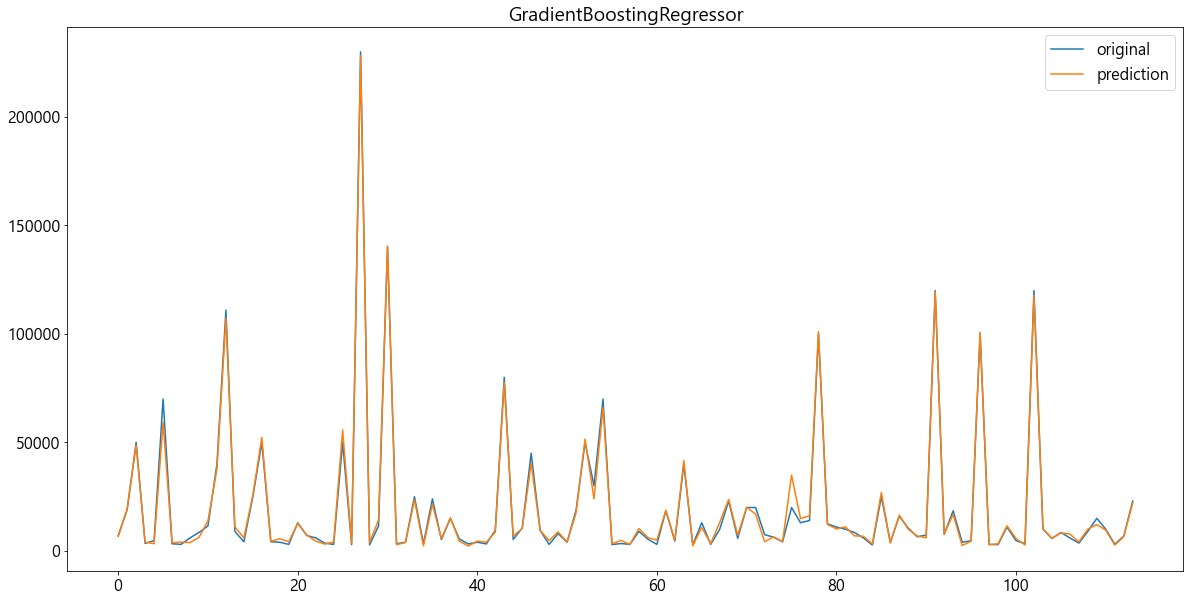

In [72]:
plt.plot(y, label='original')
plt.plot(y_pred10, label='prediction')
plt.legend()
plt.title('GradientBoostingRegressor')
plt.show()

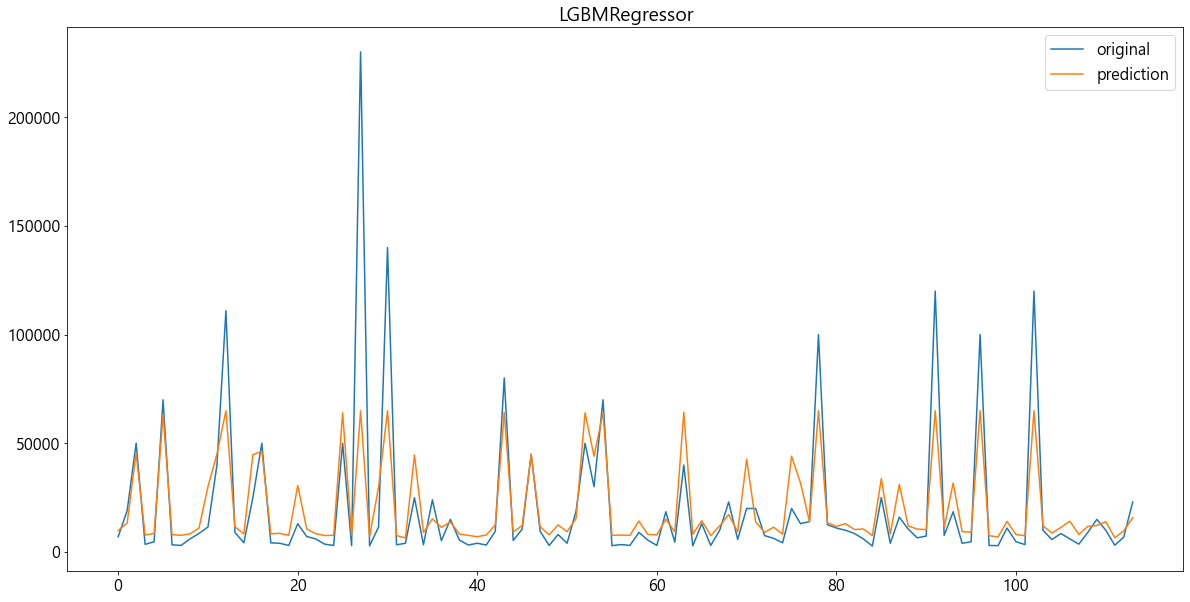

In [74]:
plt.plot(y, label='original')
plt.plot(y_pred11, label='prediction')
plt.legend()
plt.title('LGBMRegressor')
plt.show()

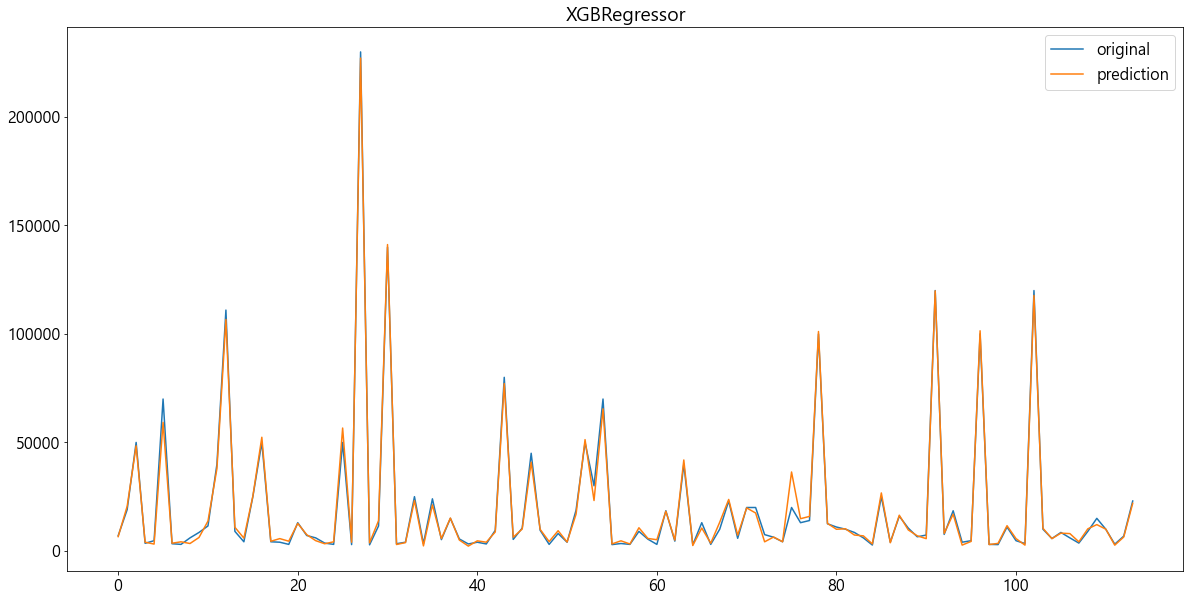

In [77]:
plt.plot(y, label='original')
plt.plot(y_pred12, label='prediction')
plt.legend()
plt.title('XGBRegressor')
plt.show()

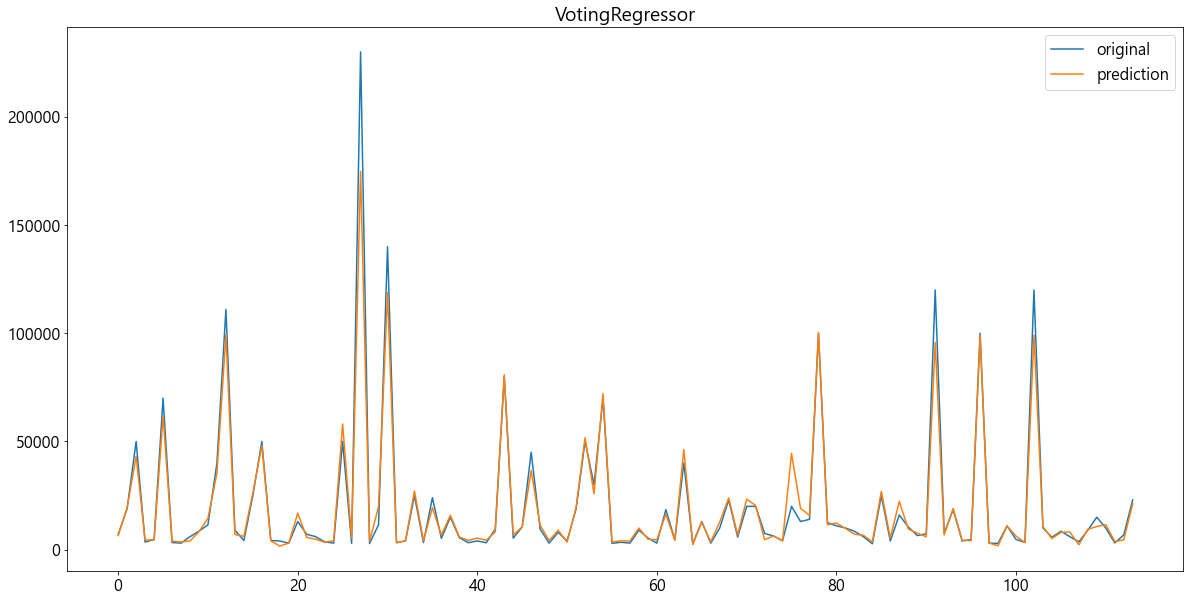

In [79]:
plt.plot(y, label='original')
plt.plot(y_pred13, label='prediction')
plt.legend()
plt.title('VotingRegressor')
plt.show()

In [78]:
best_model13

VotingRegressor(estimators=[('model1', KNeighborsRegressor(n_neighbors=3)),
                            ('model2', LinearRegression()),
                            ('model3', Ridge(alpha=10)),
                            ('model4', Lasso(alpha=1000)),
                            ('model5', ElasticNet(alpha=0.1)),
                            ('model6', SVR(C=10000)),
                            ('model7', DecisionTreeRegressor(max_depth=7)),
                            ('model8',
                             RandomForestRegressor(max_depth=9,
                                                   n_estimators=50)),
                            ('model9', AdaBoostRegress...
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=1, min_child_weight=1,
                       

### 최종평가
- 학습하지 않은 데이터를 통한 평가

In [80]:
# 학습하지 않은 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X_test)
y_pred2 = best_model2.predict(X_test)
y_pred3 = best_model3.predict(X_test)
y_pred4 = best_model4.predict(X_test)
y_pred5 = best_model5.predict(X_test)
y_pred6 = best_model6.predict(X_test)
y_pred7 = best_model7.predict(X_test)
y_pred8 = best_model8.predict(X_test)
y_pred9 = best_model9.predict(X_test)
y_pred10 = best_model10.predict(X_test)
y_pred11 = best_model11.predict(X_test)
y_pred12 = best_model12.predict(X_test)
y_pred13 = best_model13.predict(X_test)

In [81]:
# 그래프를 그리기 위해 y 값 인덱스를 다시 설정한다.
y_test.reset_index(drop=True, inplace=True)

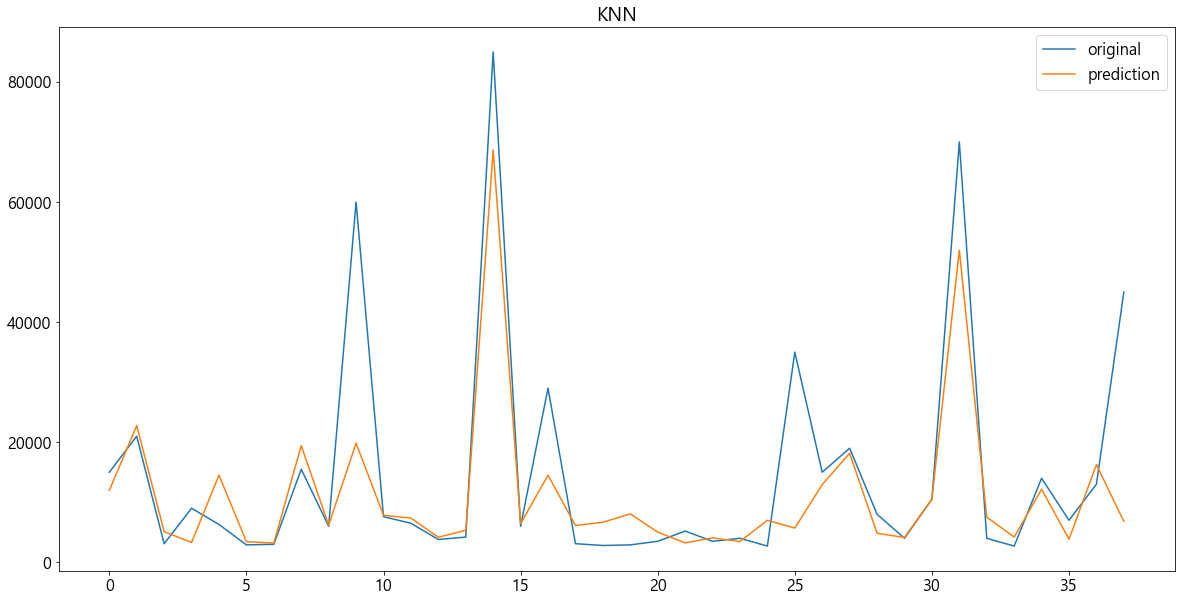

In [82]:
plt.plot(y_test, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('KNN')
plt.show()

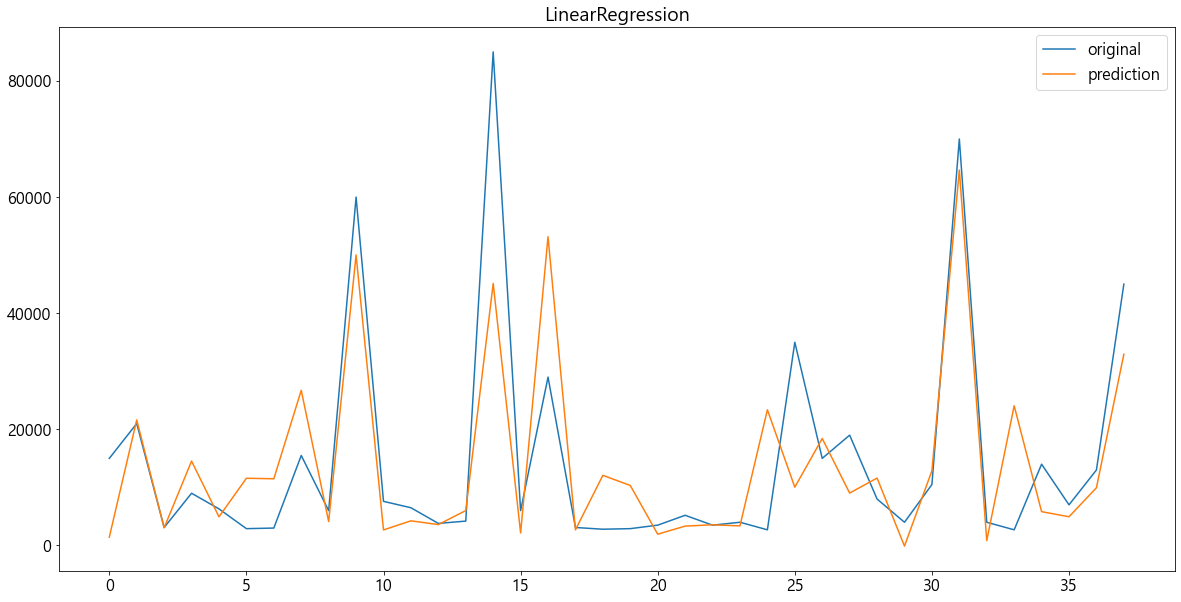

In [85]:
plt.plot(y_test, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('LinearRegression')
plt.show()

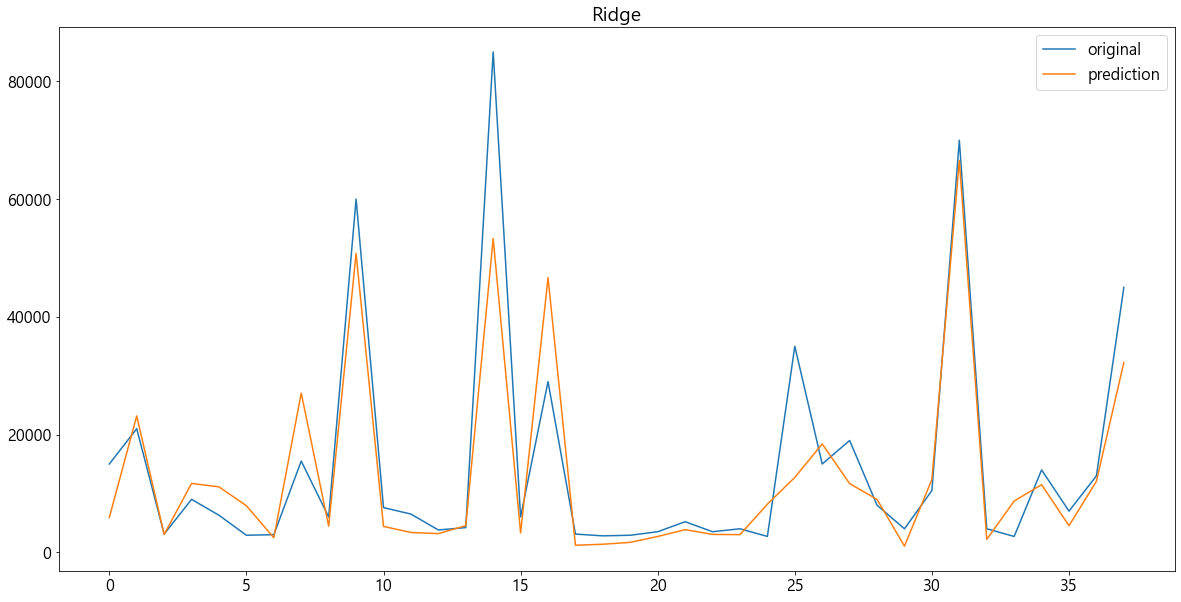

In [87]:
plt.plot(y_test, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('Ridge')
plt.show()

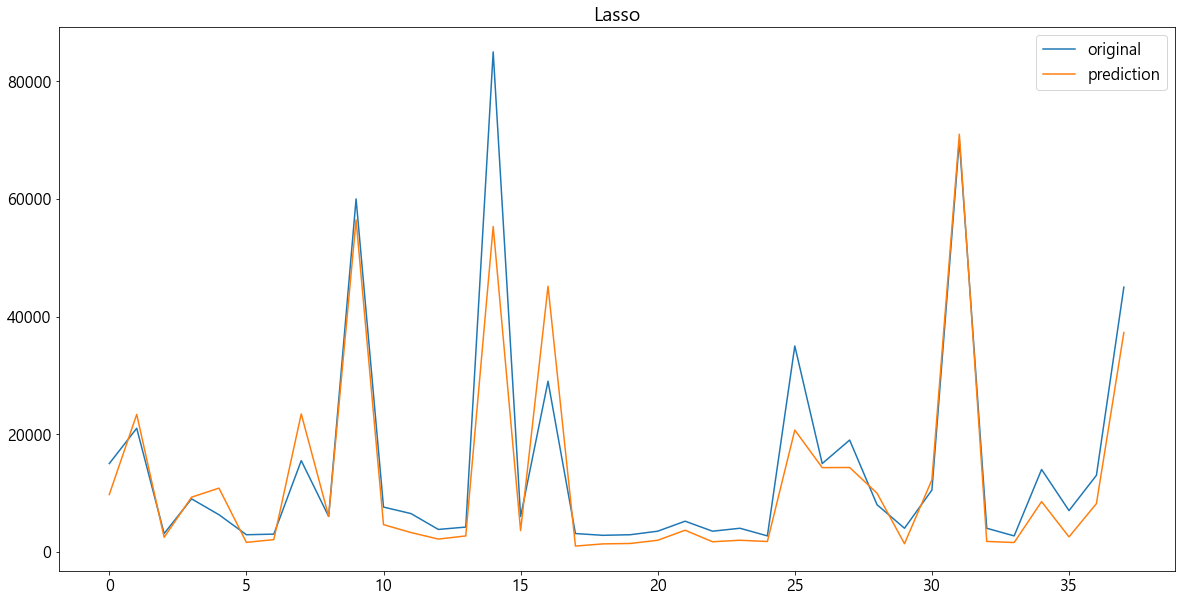

In [89]:
plt.plot(y_test, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('Lasso')
plt.show()

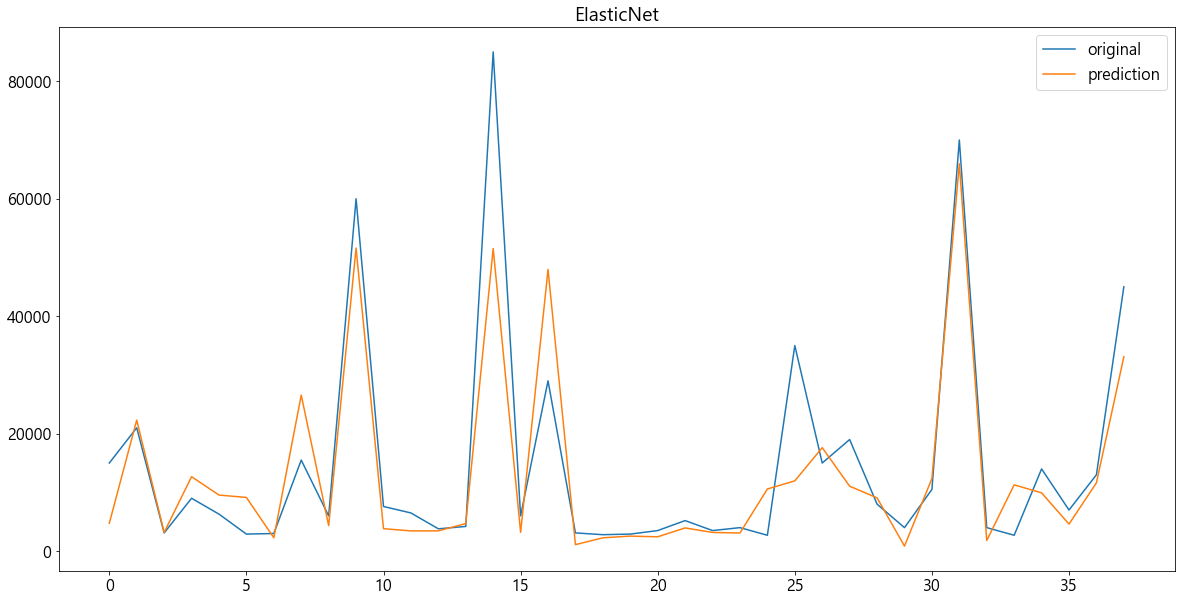

In [92]:
plt.plot(y_test, label='original')
plt.plot(y_pred5, label='prediction')
plt.legend()
plt.title('ElasticNet')
plt.show()

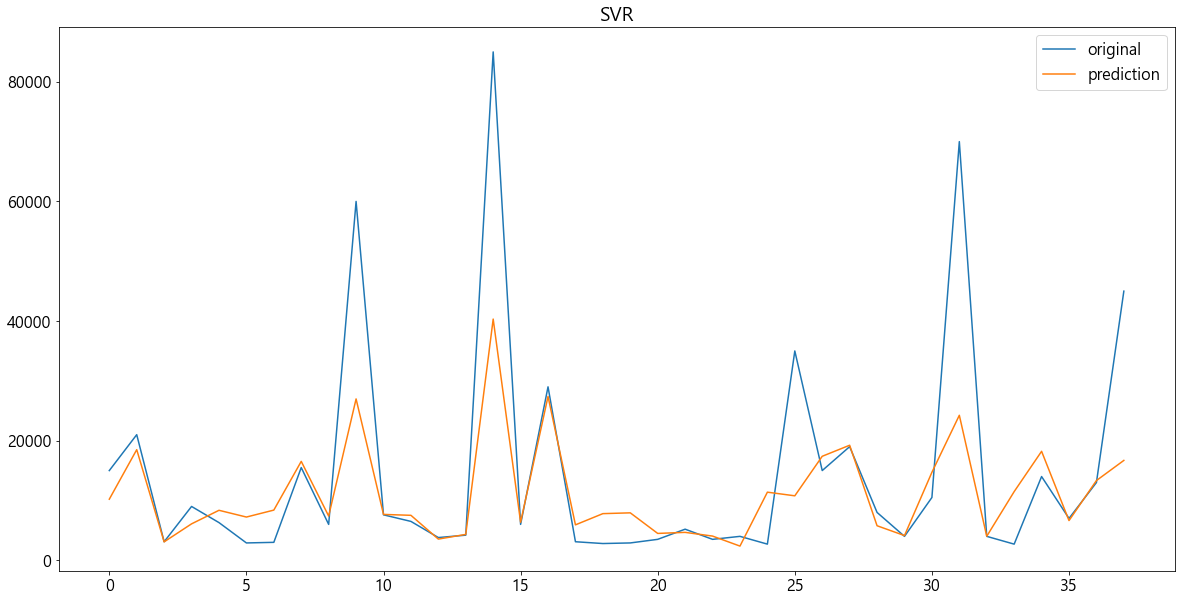

In [94]:
plt.plot(y_test, label='original')
plt.plot(y_pred6, label='prediction')
plt.legend()
plt.title('SVR')
plt.show()

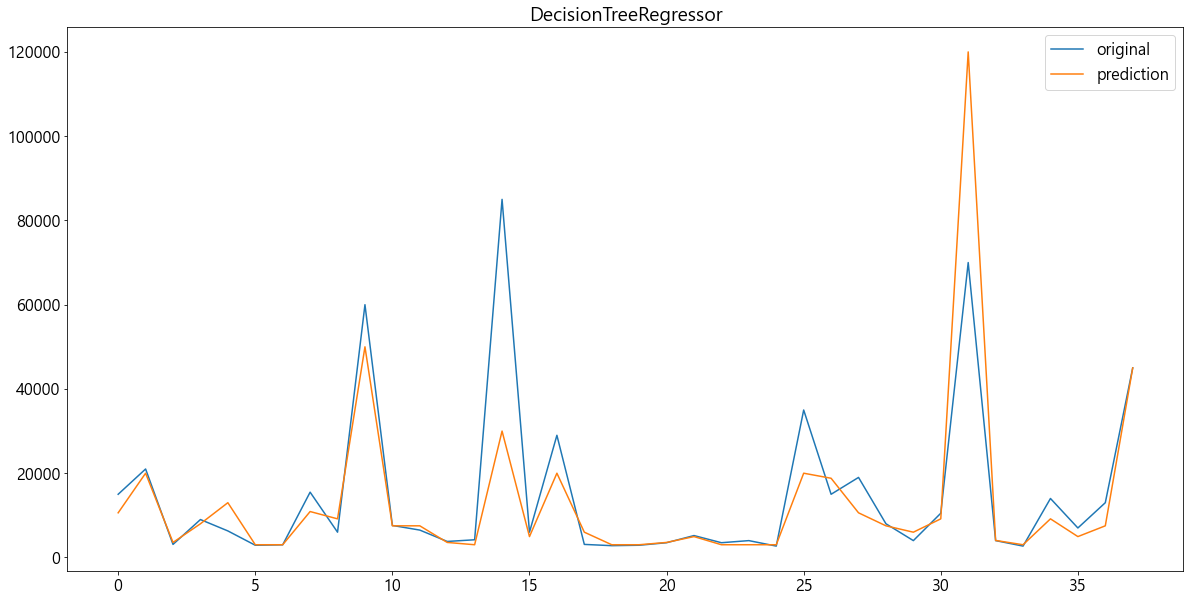

In [96]:
plt.plot(y_test, label='original')
plt.plot(y_pred7, label='prediction')
plt.legend()
plt.title('DecisionTreeRegressor')
plt.show()

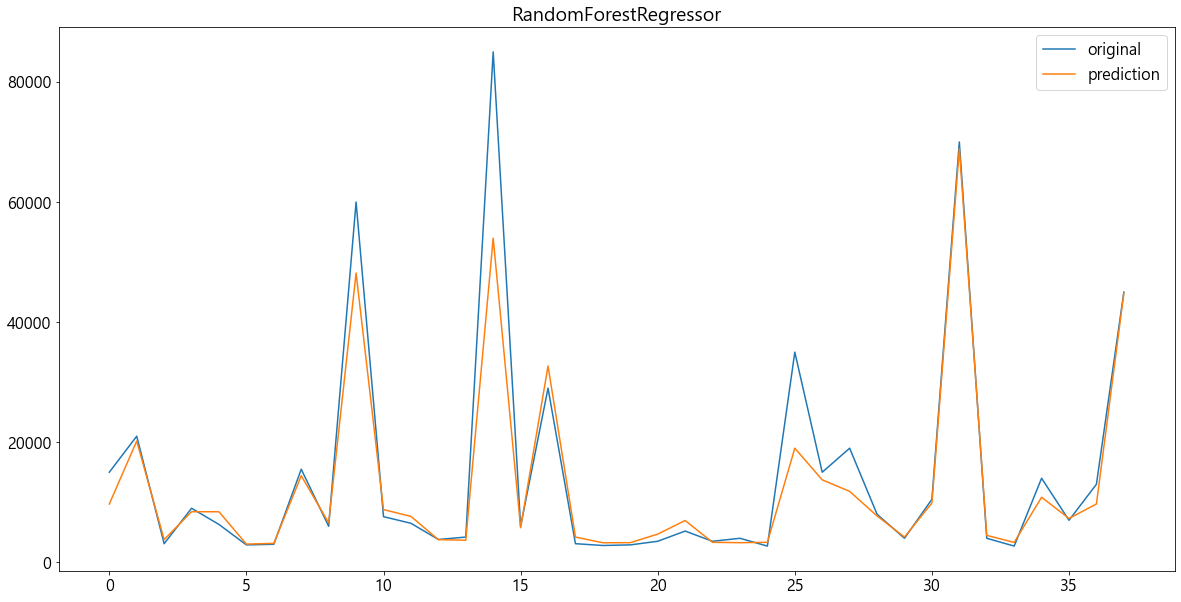

In [98]:
plt.plot(y_test, label='original')
plt.plot(y_pred8, label='prediction')
plt.legend()
plt.title('RandomForestRegressor')
plt.show()

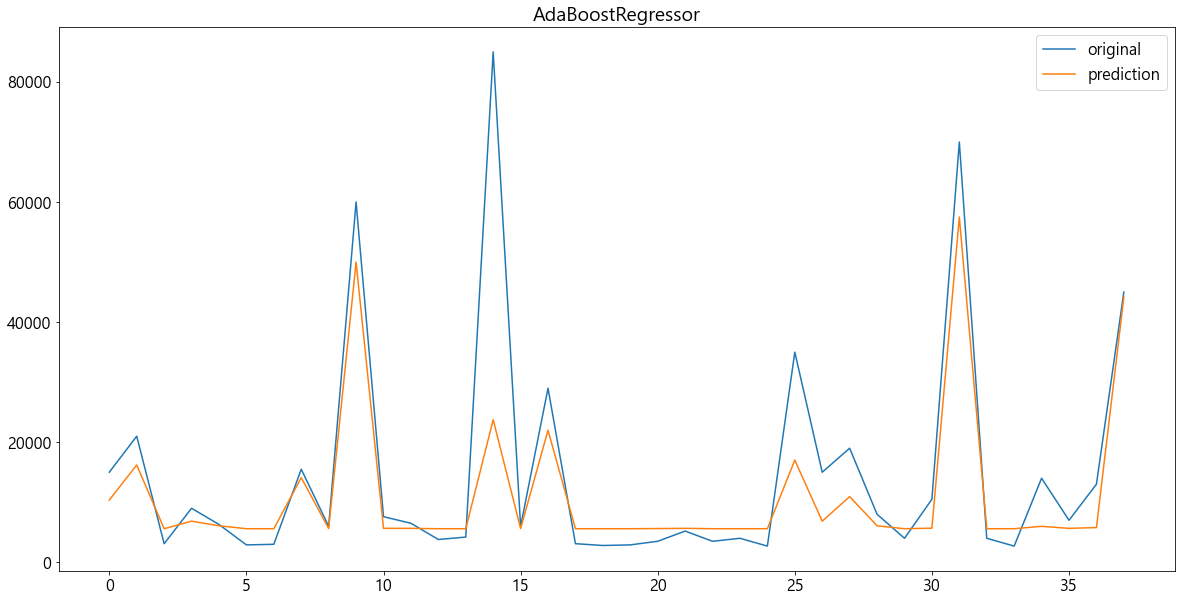

In [100]:
plt.plot(y_test, label='original')
plt.plot(y_pred9, label='prediction')
plt.legend()
plt.title('AdaBoostRegressor')
plt.show()

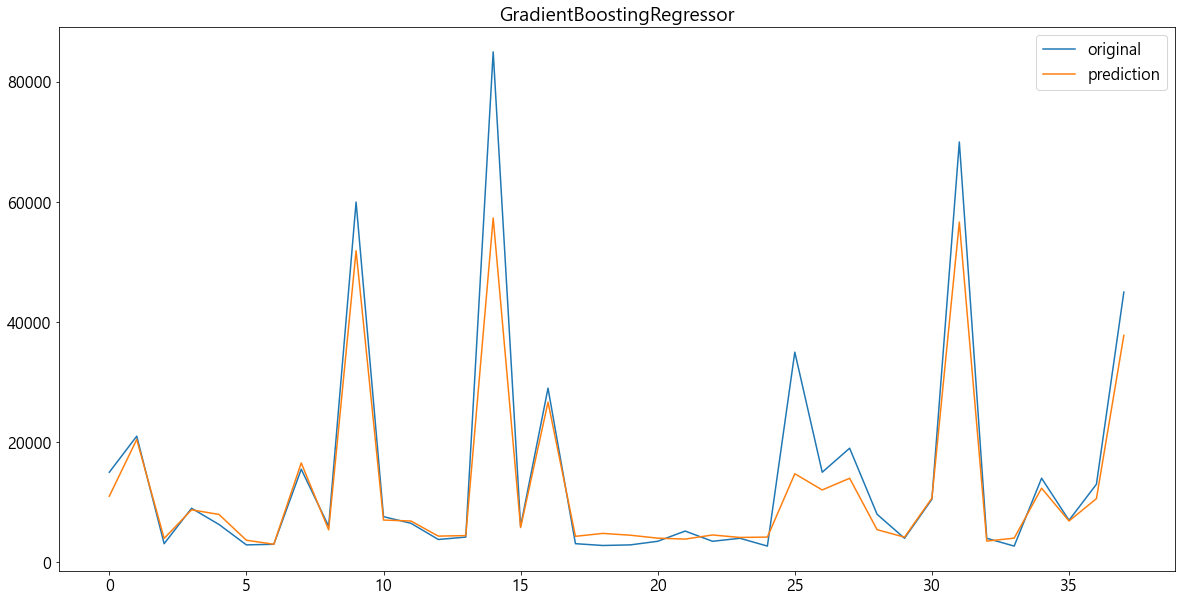

In [102]:
plt.plot(y_test, label='original')
plt.plot(y_pred10, label='prediction')
plt.legend()
plt.title('GradientBoostingRegressor')
plt.show()

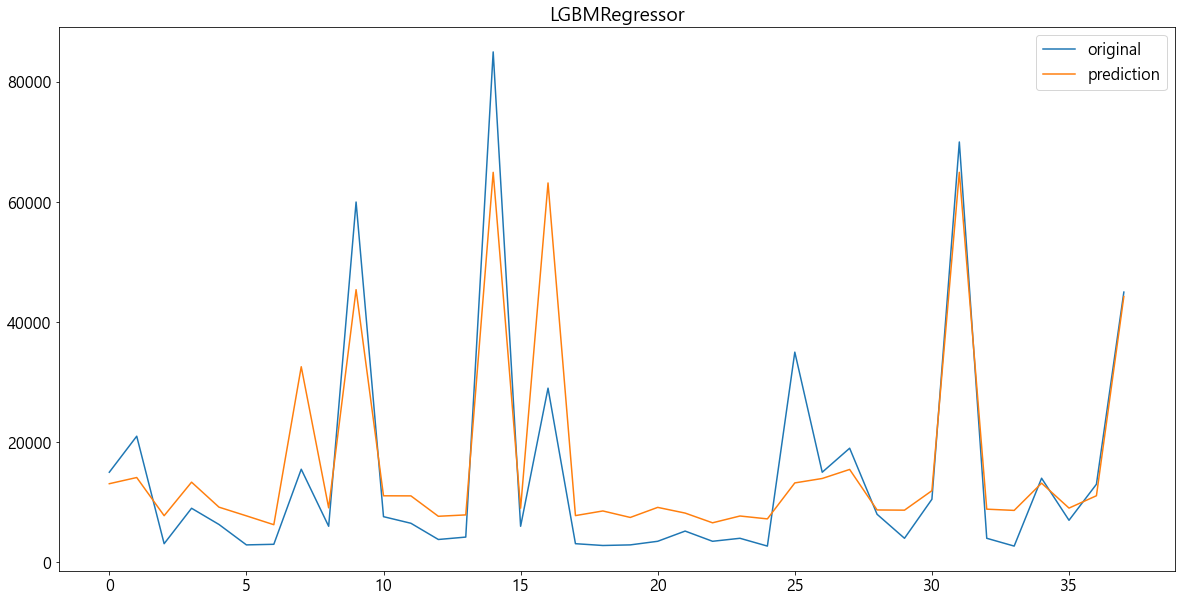

In [104]:
plt.plot(y_test, label='original')
plt.plot(y_pred11, label='prediction')
plt.legend()
plt.title('LGBMRegressor')
plt.show()

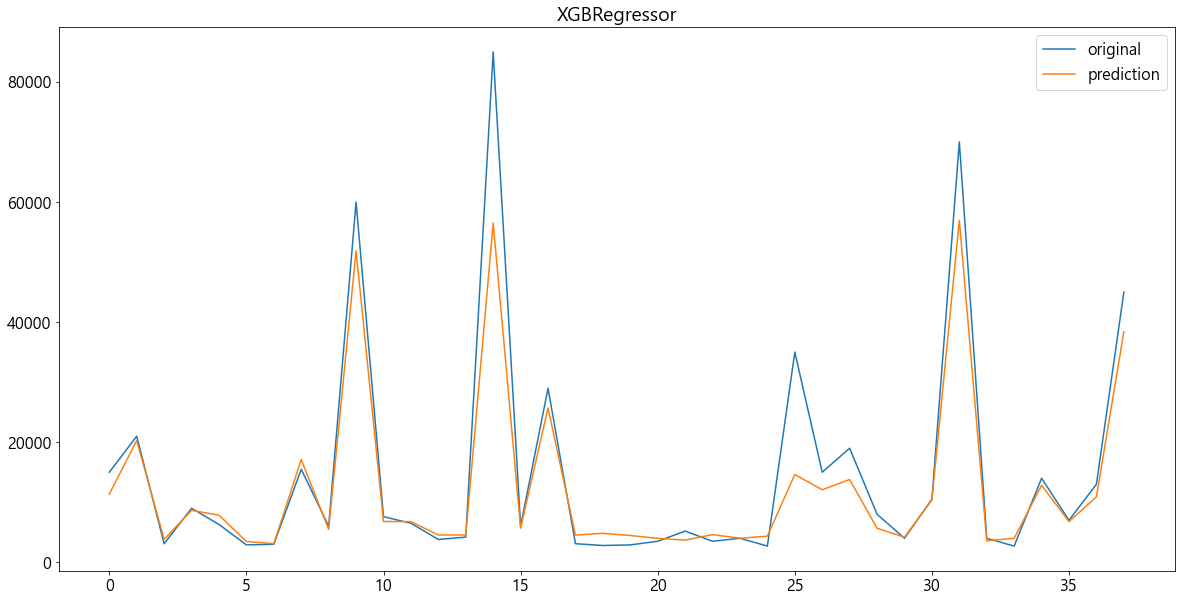

In [106]:
plt.plot(y_test, label='original')
plt.plot(y_pred12, label='prediction')
plt.legend()
plt.title('XGBRegressor')
plt.show()

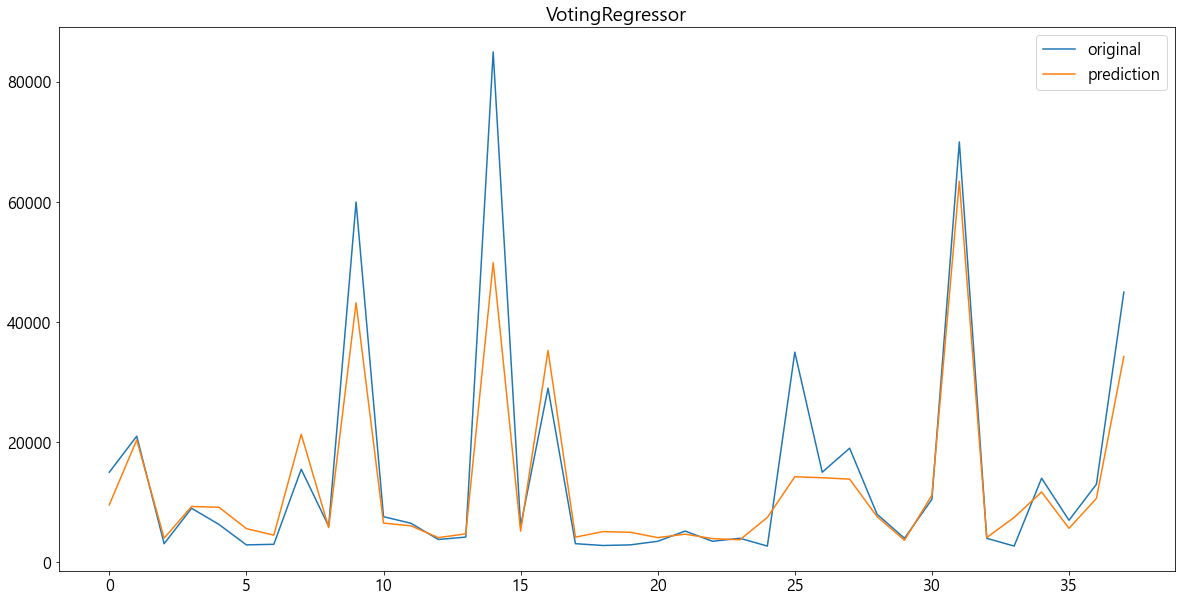

In [108]:
plt.plot(y_test, label='original')
plt.plot(y_pred13, label='prediction')
plt.legend()
plt.title('VotingRegressor')
plt.show()

### 최종 선정된 모델을 저장한다

In [111]:
with open('pitcher_model.dat', 'wb') as fp :
    # 인코더
    pickle.dump(encoder1, fp)
    # 스케일러
    pickle.dump(scaler1, fp)
    # 모델
    pickle.dump(best_model13, fp)
    
print('저장완료')

저장완료
